# Big Scale Analytics - Project 1
**_Group 9 - Alexandre Lang, Samy Bouzerda, Samuel Lew, Alix Muller_**
> git: https://github.com/samyBouzerda/BigDataAnalytics2020_Rolex

The purpose of this group project is on one hand show how to use of **Custom Vision***, a cognitive service furnished by **Microsoft Azure***. On the other hand, it will provide a long term use tutorial, easy-to-use whatever the level of the user is.

## I. Introduction

#### Microsoft Azure*
Microsoft Azure is an _"ever-expanding set of cloud services to help organizations meet their business challenges"_. It provides different tools or solutions such as IaaS, PaaS and Saas usable for analytics, virtual computing, storage, networking, and more.

https://azure.microsoft.com/en-us/overview/what-is-azure/ 

https://ccbtechnology.com/what-microsoft-azure-is-and-why-it-matters/


#### Custom Vision*
Custom Vision is typically a cognitive service offered from Microsoft Azure. More specifically, it is an _"image classifier, which is an AI service that applies labels (which represent classes) to images, according to their visual characteristics"_. So, Custom Vision will use a machine learning algorithm, such as classification, in order to recognize chosen features in provided images. The user applies oneself labels on several images, permitting the AI to train its data, permitting the user to finally test its application. 

This notebook will show step by step how to use Custom Vision efficiently.

#### Image recognition
##### How it works
The image recognition algorithm works as follow: 
* you load several images and label each one of them (for example: painting, Van Gogh, Picasso, tree, apple, etc.) according to what is represented on the picture; 
* you then train the algorithm, which is a deep learning algorithm, so it will be able to classify a previously unseen image according to the labels; the algorithm extract key features from each image according to a particular label (e.g., all images labeled with "painting" contain a squared-shape object). 

Deep learning is an algorithm that relies on an artificial neural network with a connected set of neurons, as seen in the previous course "Data mining and machine learning". 

A neuron is an aggregate function that takes many inputs to create one output. It represents an activating function that decides whether the neuron fires or not. All the parameters of the function are trained to fit the model. 

##### A simple example
Let's look at this simple Python example. All of it comes from the lesson "Neural Network" from Michalis Vlachos' **Data mining and machine learning** (MScIS, HEC, UNIL, 2019). 

We'll try to predict the number written on a piece of paper. The inputs are the images of handwritten numbers (1, 2, 7, ...), and the outputs are the associated number corresponding to the image. 

The dataset that we'll use contains rows with a set of input parameters, X, representing 64 numerical values (pixels on the image). The output, y, is a scalar representing the real number. 

In [3]:
# -- Installing some packages --
!pip install --upgrade tensorflow
!pip install keras

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5,5) # Make the figures a bit bigger
from sklearn.datasets import load_digits
from keras.utils import np_utils

# -- Load training data --
np.random.seed(1125)
nb_classes = 10

# -- The data, shuffled and split between tran and test sets --
digits = load_digits()
X = digits.data #it's a vector of 64 values (pixels), with zero being a black dot and higher values mean brighter dots
y = digits.target #it's a vector of dimension 1x1 representing the value (number) of the vector X --> y[1] = 1
#plt.imshow(X[7].reshape((8,8)), plt.get_cmap('Greys_r'), interpolation='nearest')
#plt.show()
#plt.imshow(X[1].reshape((8,8)), plt.get_cmap('Greys_r'), interpolation='nearest')

# -- Train/test split --
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
#convert target labels to one-hot vectors, this is required if we want to use categorical cross-entropy
Y_train = np_utils.to_categorical(Y_train, nb_classes) 
Y_test = np_utils.to_categorical(Y_test, nb_classes) 

# -- Building a simple neural network with Keras --
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers
np.random.seed(1125)

# -- Build the neural network --
model = Sequential()
model.add(Dense(512, input_shape=(64,)))
model.add(Activation('relu')) #An "activation" is just a non-linear function applied to the output of the layer above. Here, with a "rectified linear unit", we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2)) #Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(10))
model.add(Activation('softmax')) #This special "softmax" activation among other things, ensures that the output is a valid probability distribution, so that its values are all non-negative and sum to 1. 

# -- Compile the model --
optimizer = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#model.summary() #It shows a summary of the architecture of the neural network

# -- Train the model --
model_hist = model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

# -- Evaluate its performance --
'''plt.figure(figsize=(7,7))
plt.plot(model_hist.history['val_accuracy']) # or model_hist.history['val_acc'] depending on tf version
plt.xlabel("#Epochs")
plt.ylabel("Validation Accuracy")
plt.title("validation accuracy in different epochs")
plt.show()'''

# -- Performance of the model on the unseen test set --
score = model.evaluate(X_test, Y_test, verbose=0)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

# -- Inspecting the output --
# This outputs the highest probability class according to the trained classifier for each input example 
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
actual_classes = np.where(Y_test==1)[1]

correct_indices = np.nonzero(predicted_classes == actual_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != actual_classes)[0]

# Plot it
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[correct_indices[i]].reshape(8,8), cmap='gray', interpolation='none')
    ax.set_title("Pred: {}, True: {}".format(predicted_classes[correct_indices[i]], actual_classes[correct_indices[i]]))
plt.suptitle('Correct Predictions', y=1.05, size=14)
plt.tight_layout()
    
fig, axes = plt.subplots(2, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_test[incorrect_indices[i]].reshape(8,8), cmap='gray', interpolation='none')
    ax.set_title("Pred: {}, True: {}".format(predicted_classes[incorrect_indices[i]], actual_classes[incorrect_indices[i]]))
plt.suptitle('Incorrect Predictions', y=1.05, size=14)
plt.tight_layout()

  Using cached https://files.pythonhosted.org/packages/34/d5/ce8c17971067c0184c9045112b755be5461d5ce5253ef65a367e1298d7c5/tensorflow-2.1.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
  Found existing installation: scipy 1.2.1
    Uninstalling scipy-1.2.1:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scipy\\cluster\\hierarchy.py'
Consider using the `--user` option or check the permissions.



Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

And this is it! On these images, we can see: 
* the **input** (each vector of 64 pixels representing a handwritten number), 
* the **prediction** of our deep learing algorithm (Pred: y'), 
* and the **real value** of the number (True: y). 

In this example, the algorithm successfully predicted the values for 9 variables, and failed to assert the correct number to 9 variables. The algorithm's performance would be better if we could train it with more variables (more images). 

## II. Tutorial

This tutorial will explain _Custom Vision_ service with the following use case:

Nowadays, platforms and websites are numerous; so why not join the trend create our own platform? So let's start to imagine you created a website where people can sell their goods like furnitures, clothes, shoes,... You want to push your service further by adding a feature categorising automatically the objects on sale, by recognizing and classifying the pictures posted by your customers. First, let's start with the account creation: 

### 1. _Resource group creation_


**1-** Let's start! First open Microsoft Azure and sign up or create a Microsoft account. Azure permits one year trial for free, so select it to begin with.

> _Image 0.0. Azure portal_

**2-** Azure portal is now open. Use the search bar to find the service named "Custom Vision" and open it.

> _Image 0.1. Azure portal_

**3-** The service is now asking you to create a *Resource Group*. *Azure Resources Groups* are logical collections that can group entities such as virtual machines, storage accounts, virtual networks, web apps, databases, and/or database servers. Entities grouped in the same Resource Group are accessible in one request to Azure APIs. The following website explains more about it https://blogs.infinitesquare.com/posts/cloud/-azure-resource-group-une-nouvelle-facon-dorganiser-ses-environnements-dans-azure. In _Azure Resource Manager_ , you can manage these groups, making you able to manage your infrastucture in a visual UI rather than through scripts; tagging management; deployment templates; and simplified role-based access control. https://www.parkmycloud.com/blog/azure-resource-groups/


> _Image 0.2. Resource Groups_

Create a new Resource Group and name it. Then, choose a _Training location_ and a _Prediction Location_ and their pricing tiers before validating by clicking on _Review + create_ following by _Create_.

> _Image 0.3. Name Resource Group_

> _Image 0.4. Validation Resource Group_


**4-** You will be redirected to the description page of your new Resource Group. To start a project on Custom Vision service, click on the 2nd section link _Custom Vision portal_.

> _Image 0.5. Resource Group_


### 2. _Project creation_

**1-** Create a new project. Do not forget the purpose here: You wanted to add a feature to your website. Let's first start to train the algorithm to recognize your customers' shoes! It will be later trained to be able to recognize different type of shoes, from tongs to high heels and even to sneakers.

> _Image 1. Create the project_

> _Image 2. Fill the form_


### 3. _Model Set up_

**1-** First, create taggs. Tagging permits the algorithm to classify and categorize the pictures, by grouping their characteristics under a chosen Tag. The Tag name should represent the categories of shoes that people would search on your website such as "high heels", "fliflop", or other kind of shoes someone could look for. 

> _Image 3. Create tags_

> _Image 3.2 Create tags_

**2-** After defining the different categories, you have to "feed" the algorithm with pictures to permit it to learn the characteristics of each categories. Custom Vision advise to upload at least 7 different pictures for each Tag.

> _Image 4. Add Images_

> _Image 4.2 Add Images_

### 4. _Model training_

In this part, we will **train** our model using the different shoes images uploaded and tagged in the previous section (Model Set up). 

<img src="https://docs.microsoft.com/en-us/learn/modules/classify-images-with-custom-vision-service/media/2-portal-click-train.png">

To train our model consists in calculating three fundamental measures in classification which are: **Precision**, **Recall** and **Average Precision**. 

**Precision**    is the fraction of relevant instances among the retrieved instances 

**Recall**    is the fraction of the total amount of relevant instances that were actually retrieved

**Average Precision**    is a measure that combines recall and precision for ranked retrieval results. For one information need, the average precision is the mean of the precision scores after each relevant document is retrieved.

These measurements will help us to identify if our model is relevant.

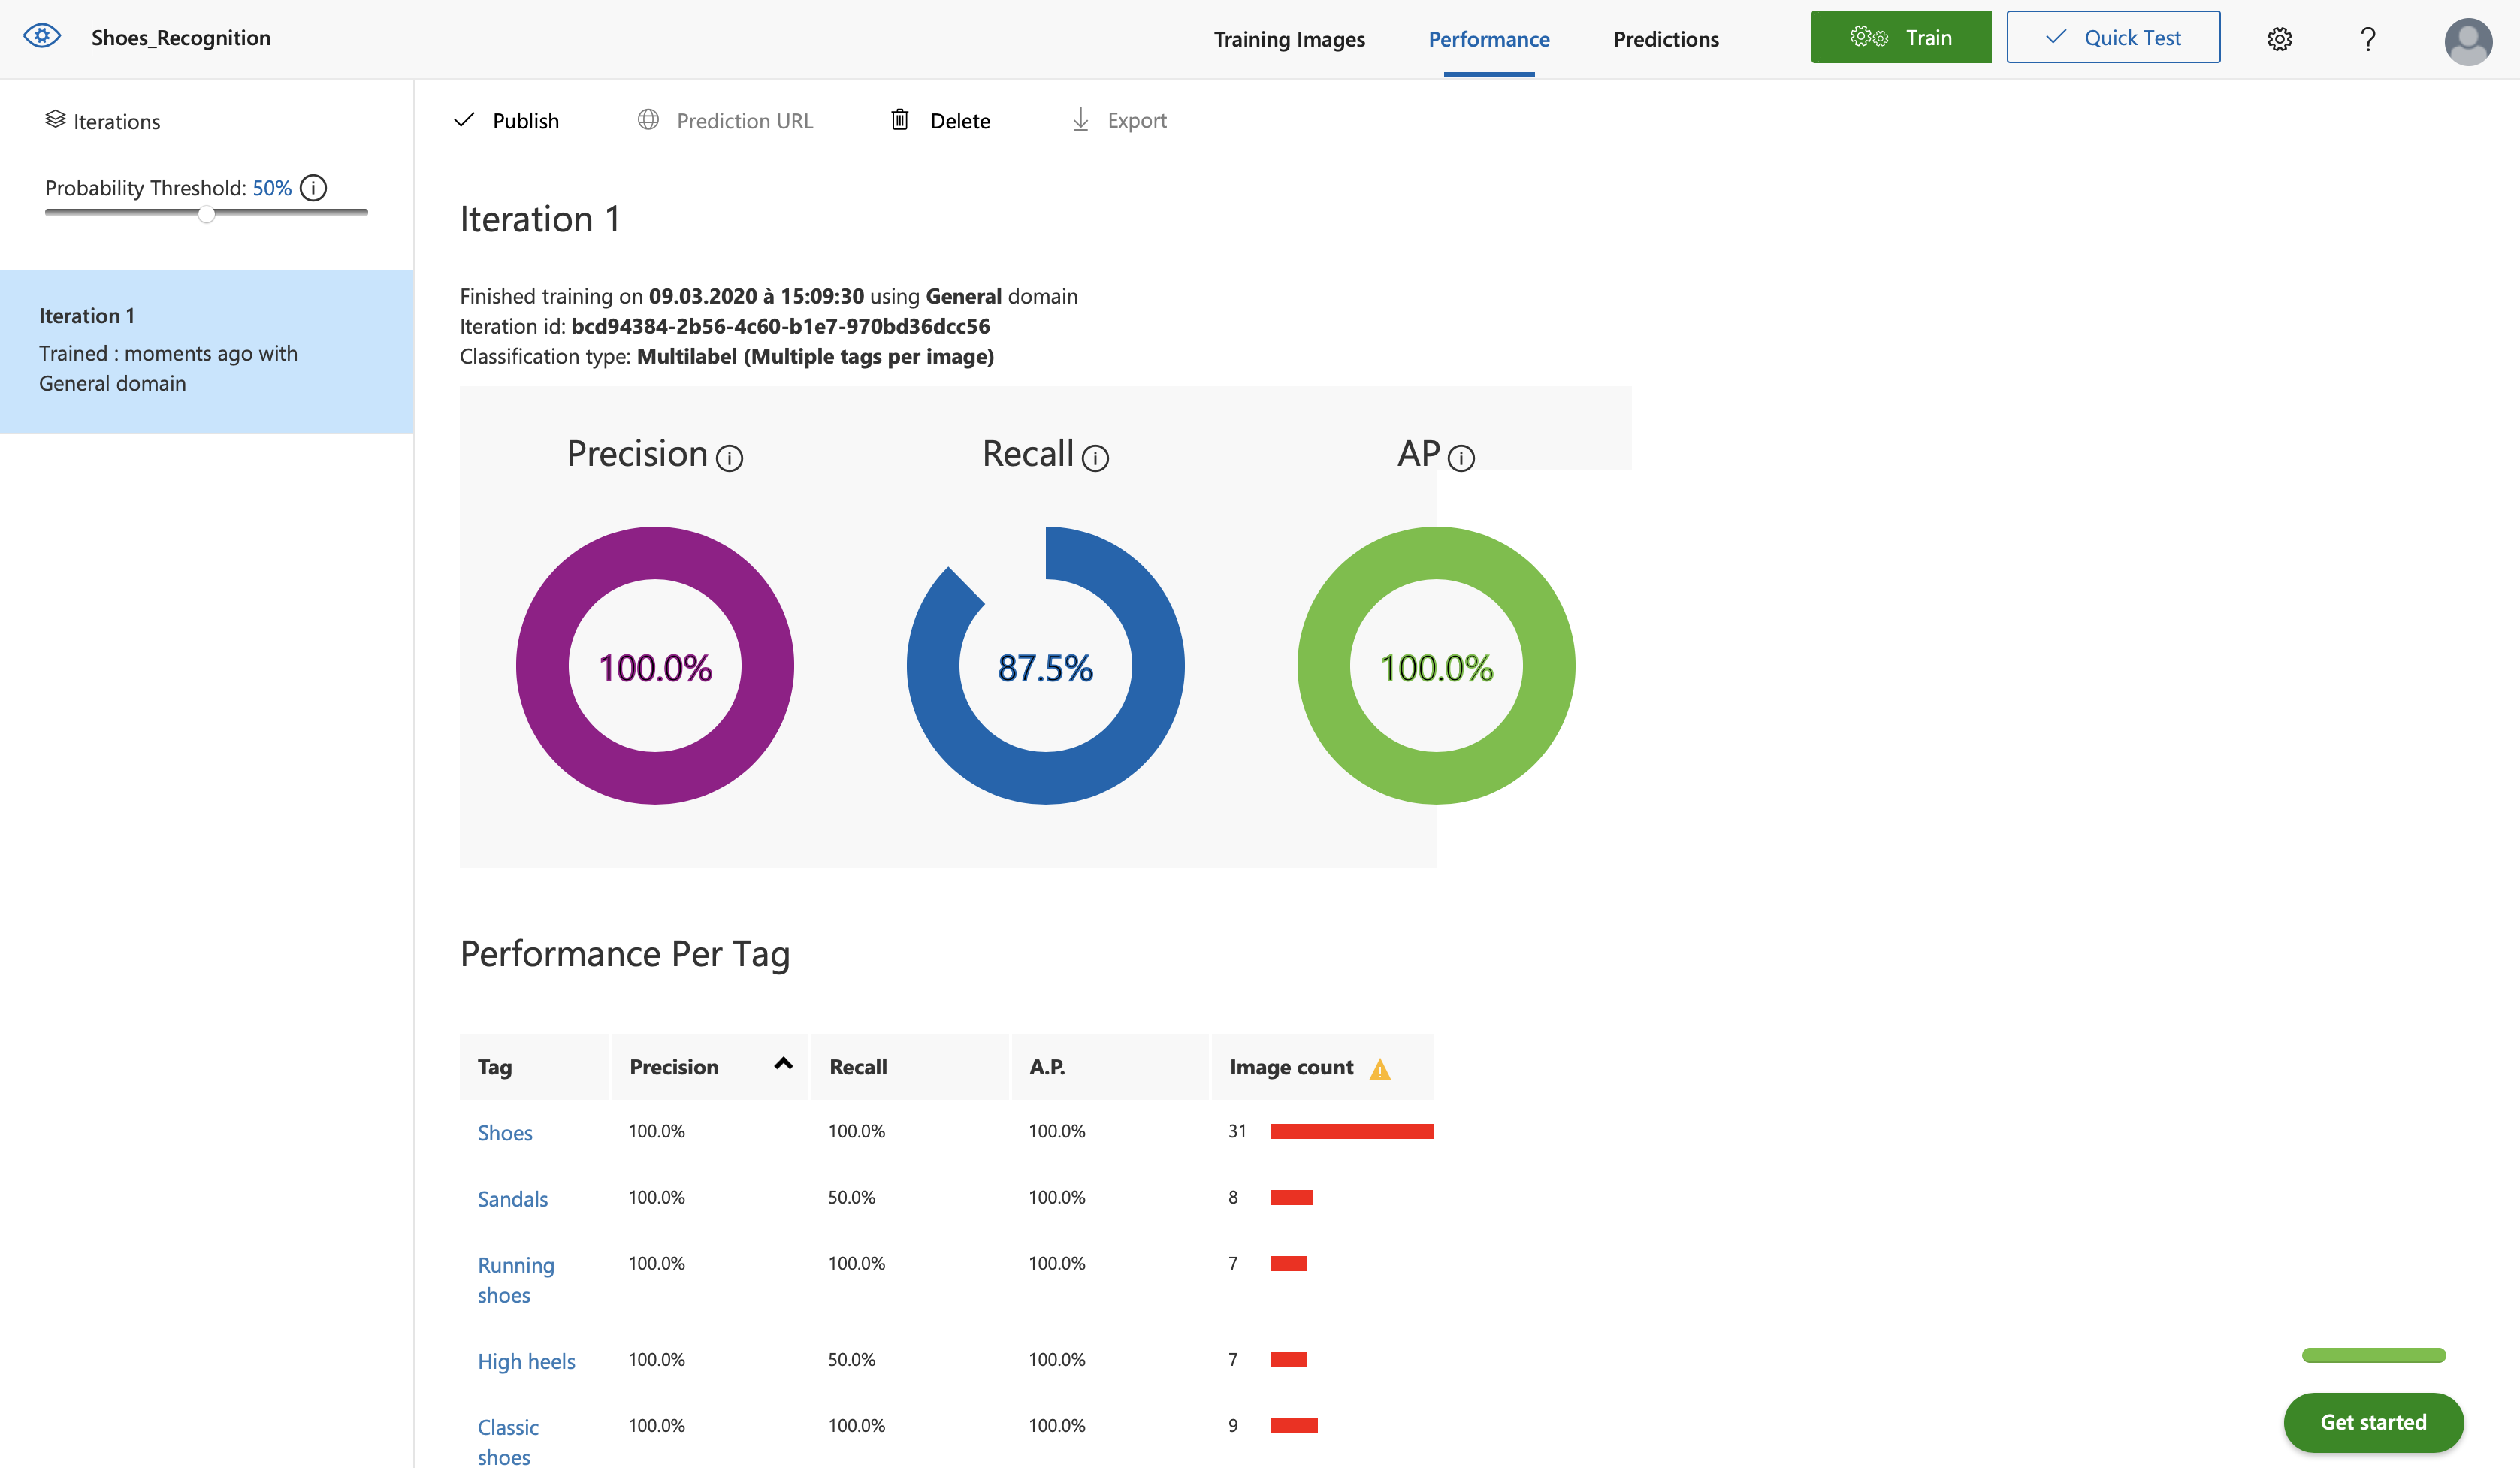

In [18]:
from IPython.display import Image
Image(filename='Resultatprecision.png',width=800, height=400)

We can see that we have **100%** _Precision_ , **87.5%** _Recall_ and finally an _Average Precision_ of **100%** 

You also have more details about the training results for each existing tag. 

These results show a good relevance from our model but it's always possible to improve and refine it by adding new tagged images and start a new training iteration.

### 5. _Model testing_

Now we will try to test our model by uploading a new image and see how our model is classifying it.

<img src="https://docs.microsoft.com/en-us/learn/modules/classify-images-with-custom-vision-service/media/4-portal-click-quick-test.png">

After uploading your image, you can select the iteration that you need to be tested in order to test the right model. 

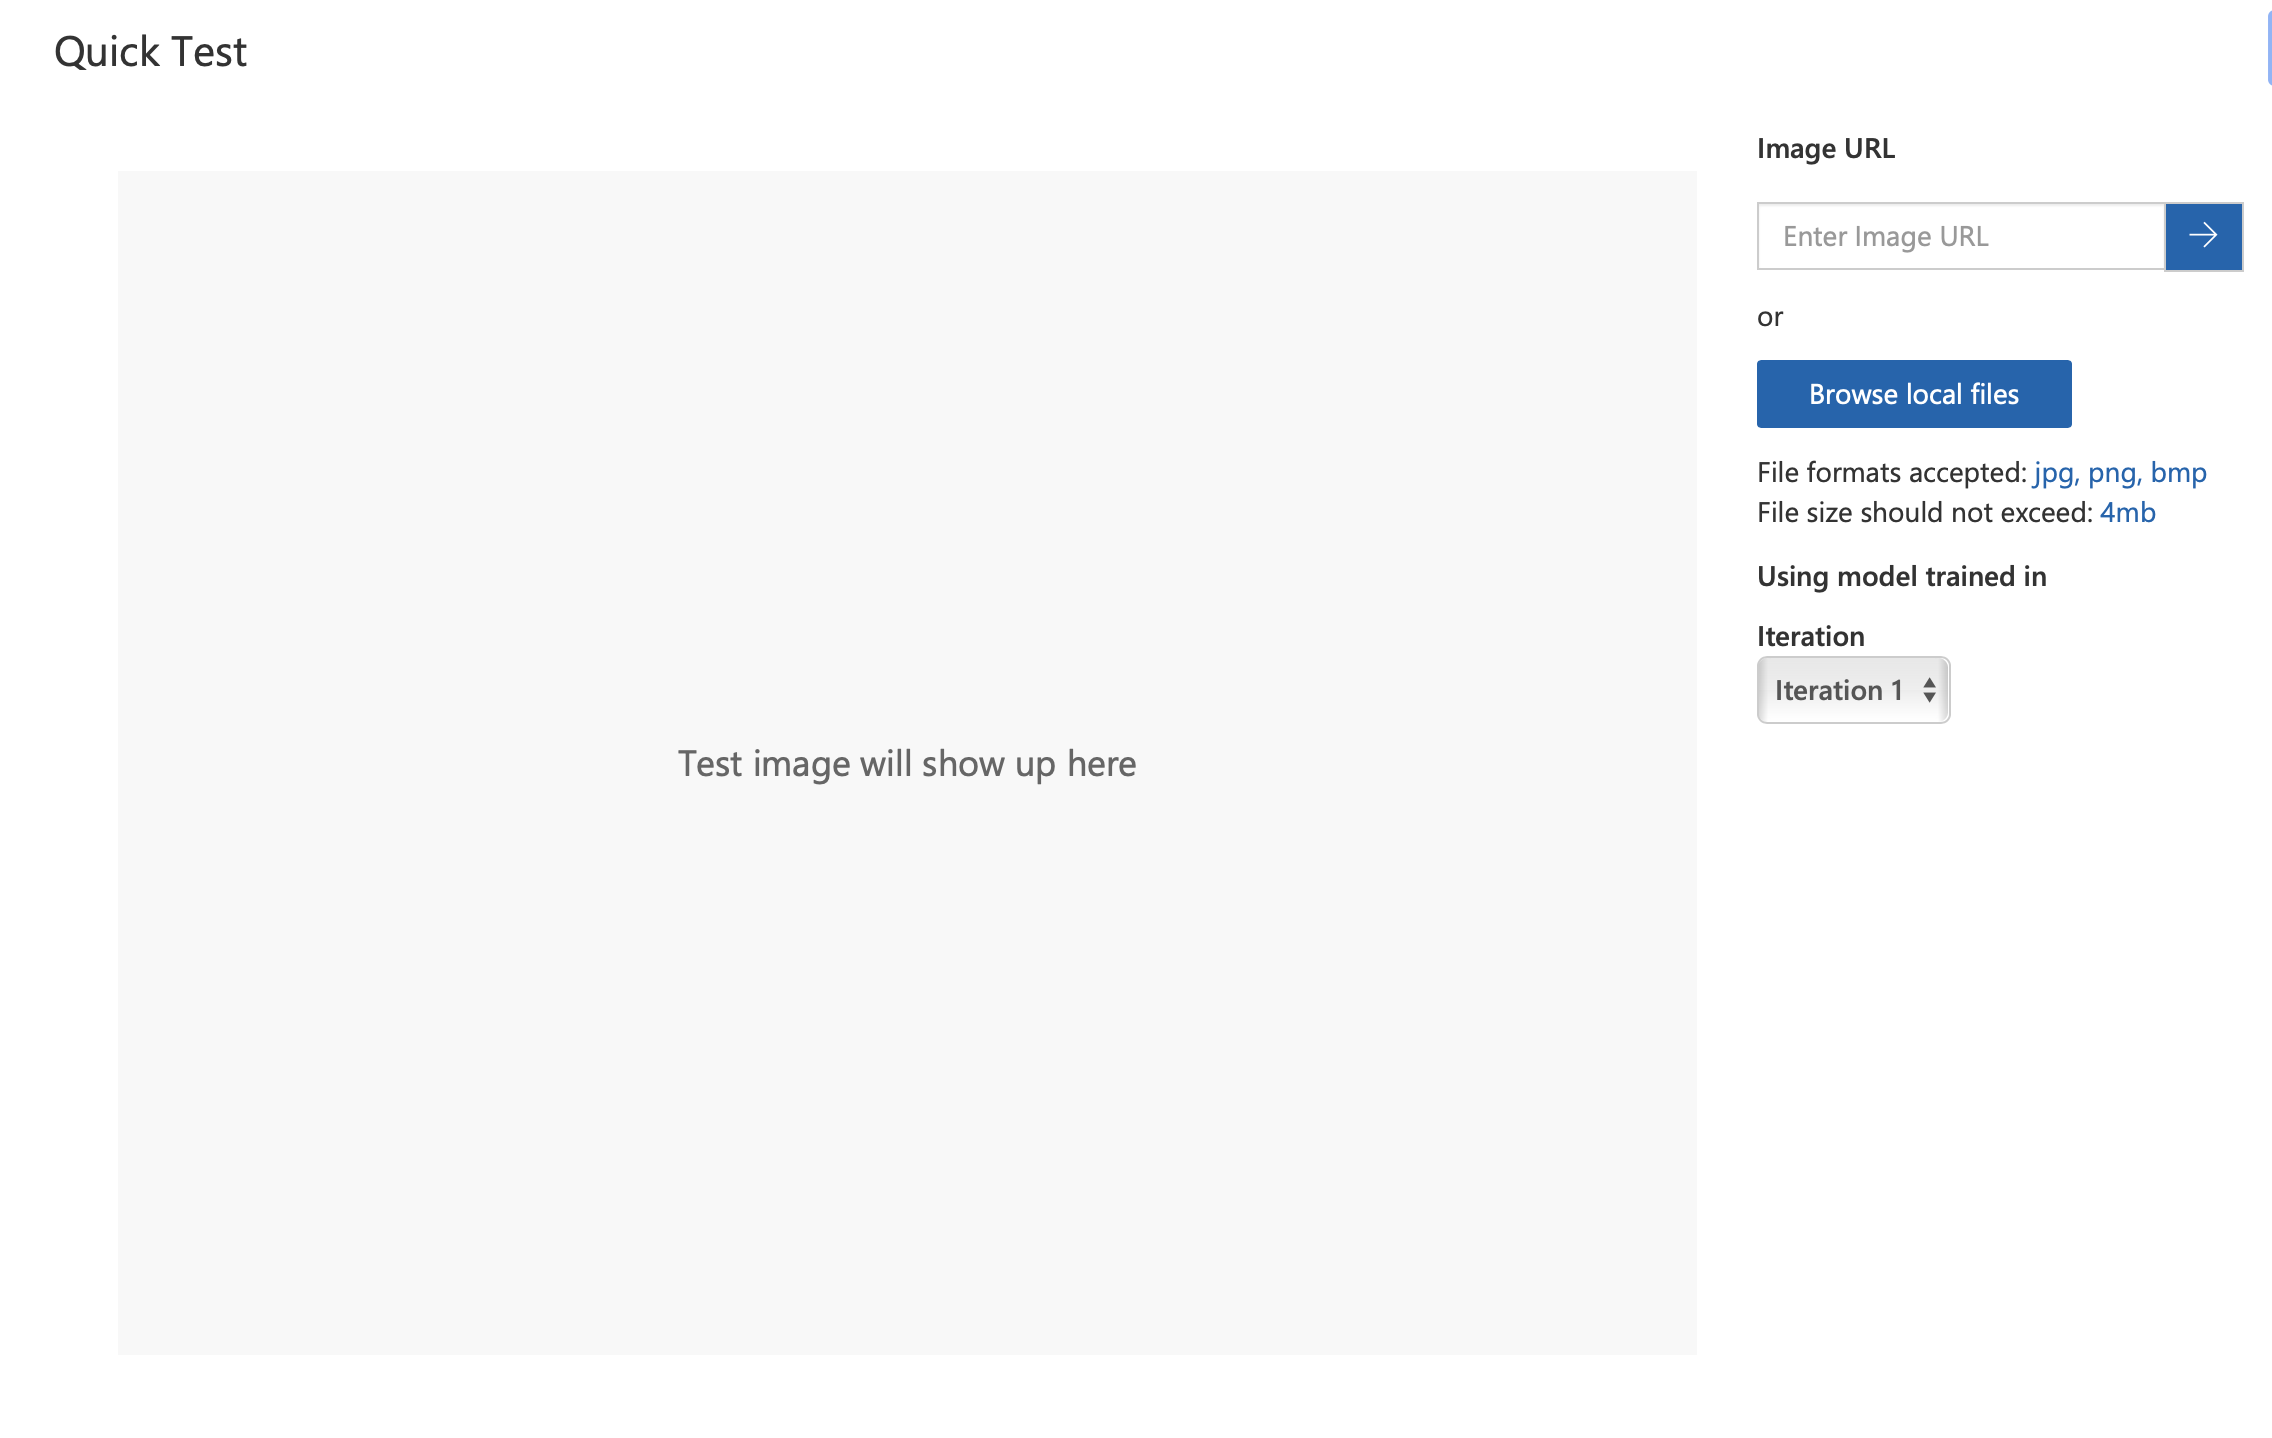

In [19]:
from IPython.display import Image
Image(filename='browseimagequicktest.png',width=800, height=400)

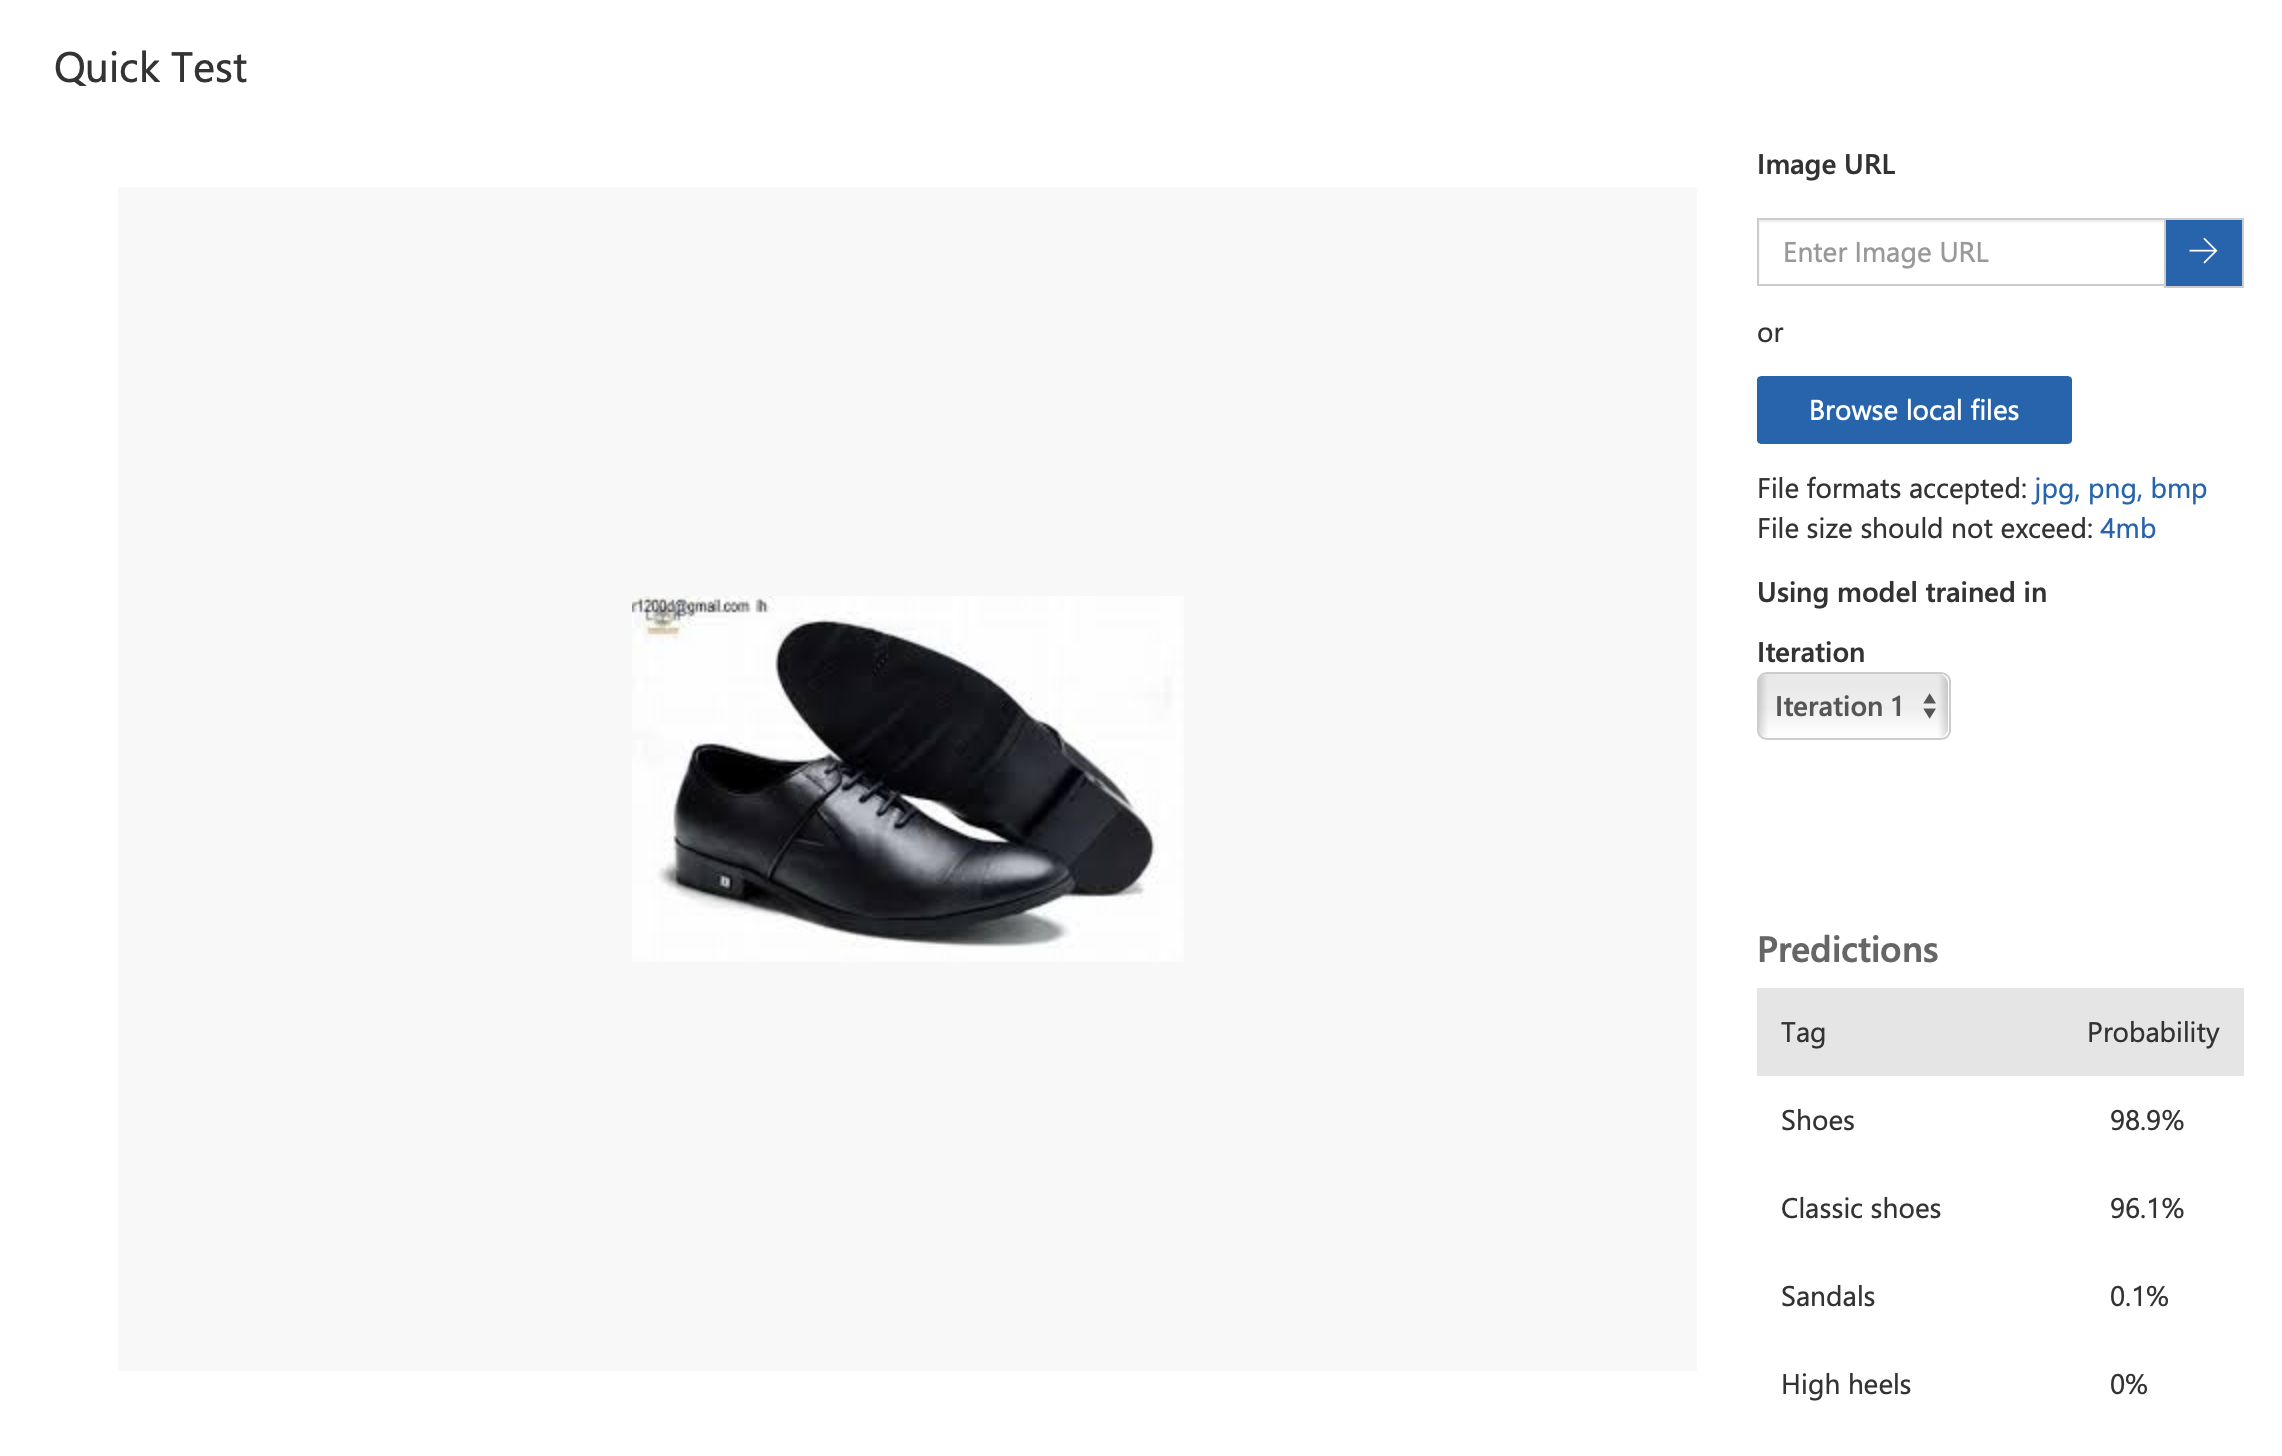

In [20]:
from IPython.display import Image
Image(filename='Resutlatquicktestclassic.png',width=800, height=400)

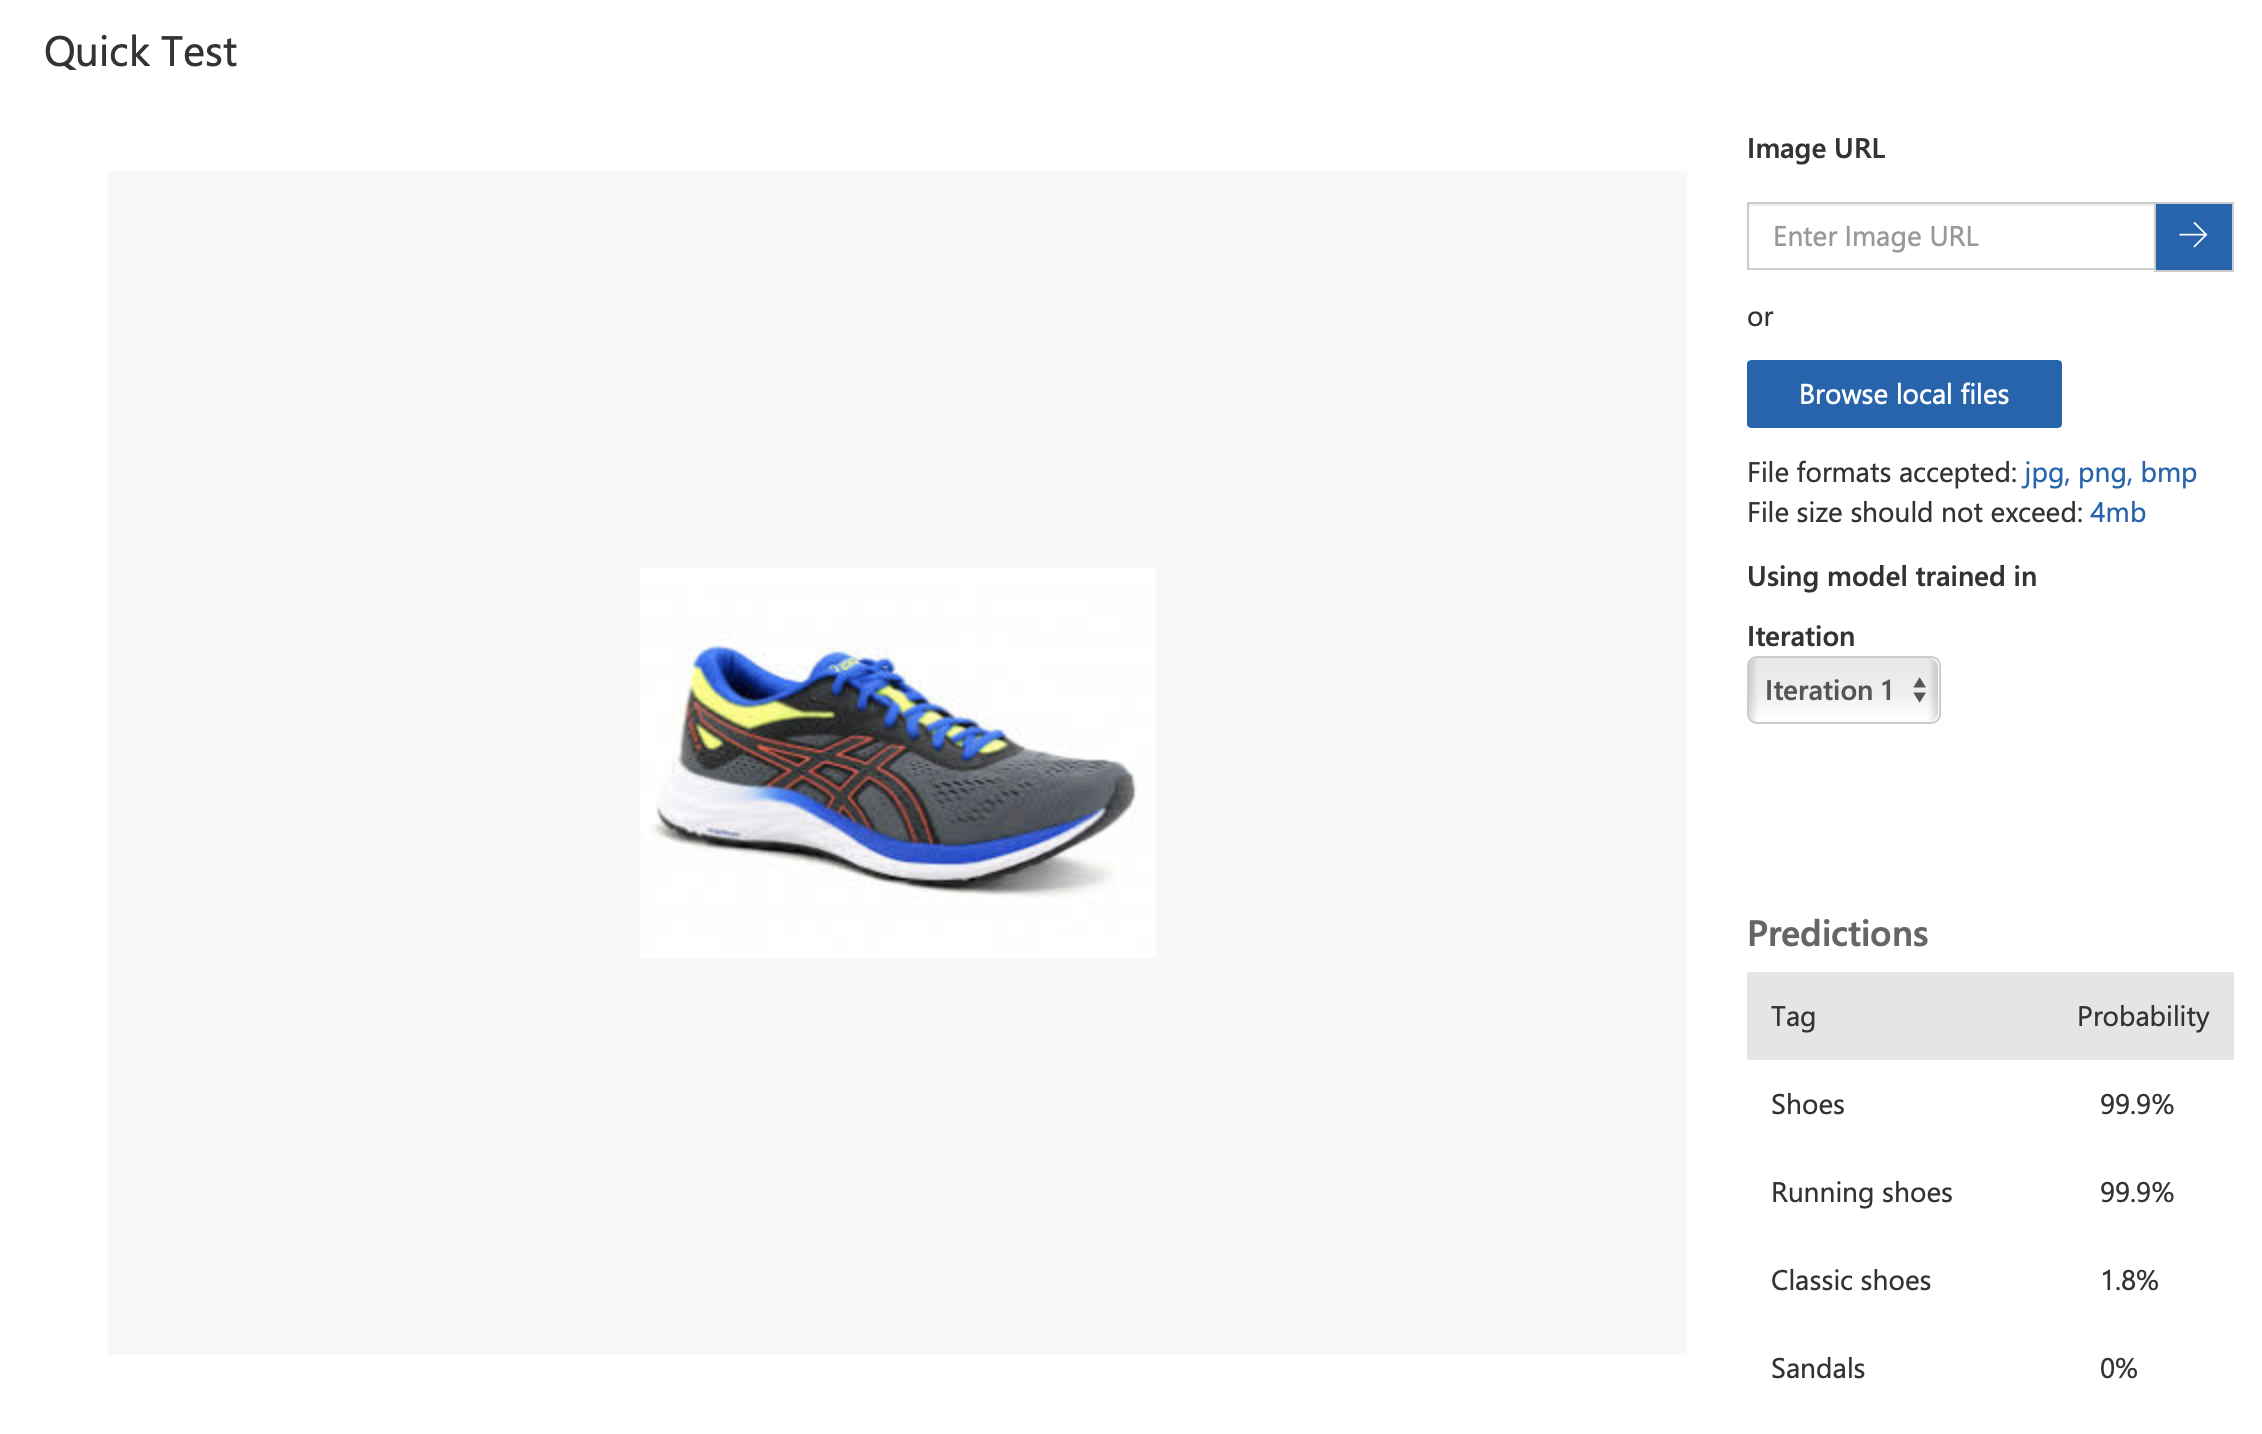

In [21]:
from IPython.display import Image
Image(filename='Resutlatquicktestrunning.png',width=800, height=400)

The service is now making a prediction about the tags that we created before. (Model Set up) 

It gives us the probability of the link between our image  each of the existing tags.

### 6. _Model prediction call over HTTP_

## IV. Summary and conclusion

### 1. _Image Classification_

### 2. _Description of the service_


### 2. _Project creation_

### 3. _Model Set up_

### 4. _Model training and testing_

### 5. _Model prediction call over HTTP_

## IV. Summary and conclusion